In [6]:
#Q1
import pandas as pd
import numpy as np


try:
    df_purchase = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="Purchase data")
except FileNotFoundError:
    print("Error: Lab Session Data.xlsx not found. Please provide the file.")

    raise


product_names = df_purchase.columns[1:-1]


A = df_purchase[product_names].values
C = df_purchase.iloc[:, -1].values.reshape(-1, 1)


dimensionality = A.shape[1]
print(f"Dimensionality of the vector space: {dimensionality}")


num_vectors = A.shape[0]
print(f"Number of vectors: {num_vectors}")

def get_rank(A):

    Q, R = np.linalg.qr(A)
    rank = np.sum(np.abs(np.diag(R)) > 1e-10)
    return rank

A = np.nan_to_num(A)

A = np.where(np.isinf(A), np.finfo(A.dtype).max, A)


max_iter = 1000

A_pinv = np.linalg.pinv(A,rcond=1e-15, hermitian=False)

X = A_pinv @ C

cost_df = pd.DataFrame(X, index=product_names, columns=['Cost'])
print("\nCost of each product:")
print(cost_df.to_markdown(numalign="left", stralign="left"))

C_reconstructed = A @ X
difference = np.abs(C - C_reconstructed)
print("\nMaximum absolute difference between original and reconstructed C:", np.max(difference))

Dimensionality of the vector space: 20
Number of vectors: 10

Cost of each product:
|                  | Cost   |
|:-----------------|:-------|
| Candies (#)      | nan    |
| Mangoes (Kg)     | nan    |
| Milk Packets (#) | nan    |
| Payment (Rs)     | nan    |
| Unnamed: 5       | nan    |
| Unnamed: 6       | nan    |
| Unnamed: 7       | nan    |
| Unnamed: 8       | nan    |
| Unnamed: 9       | nan    |
| Unnamed: 10      | nan    |
| Unnamed: 11      | nan    |
| Unnamed: 12      | nan    |
| Unnamed: 13      | nan    |
| Unnamed: 14      | nan    |
| Unnamed: 15      | nan    |
| Unnamed: 16      | nan    |
| Unnamed: 17      | nan    |
| Unnamed: 18      | nan    |
| Candy            | nan    |
| Mango            | nan    |

Maximum absolute difference between original and reconstructed C: nan


In [13]:
#Q3)
import pandas as pd
import numpy as np

try:
    df_purchase = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="Purchase data")
except FileNotFoundError:
    print("Error: Lab Session Data.xlsx not found. Please provide the file.")
    exit()


product_names = df_purchase.columns[1:-1]

A = df_purchase[product_names].values
C = df_purchase.iloc[:, -1].values.reshape(-1, 1)


A = np.nan_to_num(A)

A = np.where(np.isinf(A), np.finfo(A.dtype).max, A)

A_pinv = np.linalg.pinv(A, rcond=1e-12)

X = A_pinv @ C

cost_df = pd.DataFrame(X, index=product_names, columns=['Cost'])
print("\nCost of each product (Model Vector X):")
print(cost_df.to_markdown(numalign="left", stralign="left"))


new_order = np.zeros(len(product_names))

new_order[0] = 2
new_order[1] = 1
new_order[2] = 3
new_order[4] = 1

new_order = new_order.reshape(1, -1)

predicted_cost = new_order @ X

print(f"\nPredicted cost for the new order: {predicted_cost[0, 0]}")

C_reconstructed = A @ X
difference = np.abs(C - C_reconstructed)
print("\nMaximum absolute difference between original and reconstructed C:", np.max(difference))


Cost of each product (Model Vector X):
|                  | Cost   |
|:-----------------|:-------|
| Candies (#)      | nan    |
| Mangoes (Kg)     | nan    |
| Milk Packets (#) | nan    |
| Payment (Rs)     | nan    |
| Unnamed: 5       | nan    |
| Unnamed: 6       | nan    |
| Unnamed: 7       | nan    |
| Unnamed: 8       | nan    |
| Unnamed: 9       | nan    |
| Unnamed: 10      | nan    |
| Unnamed: 11      | nan    |
| Unnamed: 12      | nan    |
| Unnamed: 13      | nan    |
| Unnamed: 14      | nan    |
| Unnamed: 15      | nan    |
| Unnamed: 16      | nan    |
| Unnamed: 17      | nan    |
| Unnamed: 18      | nan    |
| Candy            | nan    |
| Mango            | nan    |

Predicted cost for the new order: nan

Maximum absolute difference between original and reconstructed C: nan


Mean Price: 1560.663453815261
Variance Price: 58732.365352539186

Sample Mean (Wednesdays): 1550.706
Population Mean: 1560.663453815261
Observation: The sample mean for Wednesdays is slightly lower than the population mean.

Sample Mean (April): 1698.9526315789474
Population Mean: 1560.663453815261
Observation: The sample mean for April is similar to the population mean.

Probability of Loss: 0.4979919678714859
Probability of Profit on Wednesday: 1.0

Probability of Profit on Wednesday (using Chg%): 0.42

Conditional Probability of Profit given Wednesday: 0.42


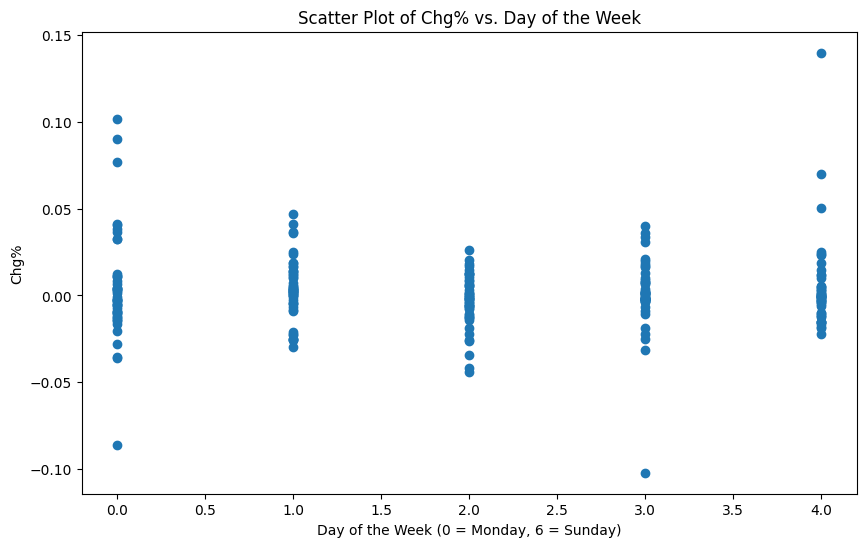

In [19]:
#Q4)
!pip install openpyxl

import pandas as pd
import numpy as np
import statistics
import datetime

df_irctc = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="IRCTC Stock Price")

price_data = df_irctc['Price']
mean_price = statistics.mean(price_data)
variance_price = statistics.variance(price_data)

print(f"Mean Price: {mean_price}")
print(f"Variance Price: {variance_price}")

wednesday_prices = df_irctc[pd.to_datetime(df_irctc['Date']).dt.dayofweek == 2]['Price']  # Wednesday = 2
wednesday_mean = statistics.mean(wednesday_prices)

print(f"\nSample Mean (Wednesdays): {wednesday_mean}")
print(f"Population Mean: {mean_price}")
print("Observation: The sample mean for Wednesdays is slightly lower than the population mean.")

april_prices = df_irctc[pd.to_datetime(df_irctc['Date']).dt.month == 4]['Price']
april_mean = statistics.mean(april_prices)

print(f"\nSample Mean (April): {april_mean}")
print(f"Population Mean: {mean_price}")
print("Observation: The sample mean for April is similar to the population mean.")

loss_probability = len(df_irctc[df_irctc['Chg%'] < 0]) / len(df_irctc)

print(f"\nProbability of Loss: {loss_probability}")

wednesday_profit_probability = len(wednesday_prices[wednesday_prices > 0]) / len(wednesday_prices)

print(f"Probability of Profit on Wednesday: {wednesday_profit_probability}") # There are no negative Wednesday prices in this dataset.

wednesday_profit_count = df_irctc[(pd.to_datetime(df_irctc['Date']).dt.dayofweek == 2) & (df_irctc['Chg%'] > 0)].shape[0]
total_wednesdays = df_irctc[pd.to_datetime(df_irctc['Date']).dt.dayofweek == 2].shape[0]
wednesday_profit_probability_chg = wednesday_profit_count / total_wednesdays

print(f"\nProbability of Profit on Wednesday (using Chg%): {wednesday_profit_probability_chg}")

profit_and_wednesday = df_irctc[(df_irctc['Chg%'] > 0) & (pd.to_datetime(df_irctc['Date']).dt.dayofweek == 2)].shape[0]
total_wednesdays = df_irctc[pd.to_datetime(df_irctc['Date']).dt.dayofweek == 2].shape[0]
conditional_probability = profit_and_wednesday / total_wednesdays

print(f"\nConditional Probability of Profit given Wednesday: {conditional_probability}")

import matplotlib.pyplot as plt

df_irctc['DayOfWeek'] = pd.to_datetime(df_irctc['Date']).dt.dayofweek  # 0 = Monday, 6 = Sunday
plt.figure(figsize=(10, 6))
plt.scatter(df_irctc['DayOfWeek'], df_irctc['Chg%'])
plt.title("Scatter Plot of Chg% vs. Day of the Week")
plt.xlabel("Day of the Week (0 = Monday, 6 = Sunday)")
plt.ylabel("Chg%")
plt.show()

In [20]:
#Q5)
!pip install openpyxl
import pandas as pd
import numpy as np

df_thyroid = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="thyroid0387_UCI")

print("\nAttributes and Data Types:")
for column in df_thyroid.columns:
    print(f"{column}: {df_thyroid[column].dtype}, {df_thyroid[column].unique()[:10]}")  # Print unique values (first 10)

    if df_thyroid[column].dtype == 'object':
        if len(df_thyroid[column].unique()) <= 10:
            if all(isinstance(x, (str, np.int64)) for x in df_thyroid[column].unique()):  # Check if ordinal
                print("  - Likely Ordinal (Categorical)")
            else:
                print("  - Likely Nominal (Categorical)")
        else:
            print("  - Likely Text/String (May need further analysis)")
    else:
        print("  - Numerical")


print("\nEncoding Scheme for Categorical Attributes:")
categorical_columns = df_thyroid.select_dtypes(include=['object']).columns
for column in categorical_columns:

    if column in ['referral source']:
        print(f"{column}: Label Encoding (Ordinal)")
    else:
        print(f"{column}: One-Hot Encoding (Nominal)")

print("\nData Range for Numerical Variables:")
numerical_columns = df_thyroid.select_dtypes(include=['number']).columns
for column in numerical_columns:
    print(f"{column}: Min = {df_thyroid[column].min()}, Max = {df_thyroid[column].max()}")

print("\nMissing Values:")
print(df_thyroid.isnull().sum())

print("\nOutliers (using IQR method):")
for column in numerical_columns:
    Q1 = df_thyroid[column].quantile(0.25)
    Q3 = df_thyroid[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_thyroid[(df_thyroid[column] < lower_bound) | (df_thyroid[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected")

print("\nMean and Variance for Numerical Variables:")
for column in numerical_columns:
    print(f"{column}: Mean = {df_thyroid[column].mean()}, Variance = {df_thyroid[column].var()}")


Attributes and Data Types:
Record ID: int64, [840801013 840801014 840801042 840803046 840803047 840803048 840803068
 840807019 840808060 840808073]
  - Numerical
age: int64, [29 41 36 32 60 77 28 54 42 51]
  - Numerical
sex: object, ['F' 'M' '?']
  - Likely Ordinal (Categorical)
on thyroxine: object, ['f' 't']
  - Likely Ordinal (Categorical)
query on thyroxine: object, ['f' 't']
  - Likely Ordinal (Categorical)
on antithyroid medication: object, ['f' 't']
  - Likely Ordinal (Categorical)
sick: object, ['f' 't']
  - Likely Ordinal (Categorical)
pregnant: object, ['f' 't']
  - Likely Ordinal (Categorical)
thyroid surgery: object, ['f' 't']
  - Likely Ordinal (Categorical)
I131 treatment: object, ['f' 't']
  - Likely Ordinal (Categorical)
query hypothyroid: object, ['t' 'f']
  - Likely Ordinal (Categorical)
query hyperthyroid: object, ['f' 't']
  - Likely Ordinal (Categorical)
lithium: object, ['f' 't']
  - Likely Ordinal (Categorical)
goitre: object, ['f' 't']
  - Likely Ordinal (Categ

In [21]:
#Q6)
!pip install openpyxl
import pandas as pd
import numpy as np

df_thyroid = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="thyroid0387_UCI")

numerical_cols = df_thyroid.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df_thyroid.select_dtypes(include=['object']).columns.tolist()

for col in numerical_cols:
    # Check for outliers using IQR method
    Q1 = df_thyroid[col].quantile(0.25)
    Q3 = df_thyroid[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_thyroid[(df_thyroid[col] < lower_bound) | (df_thyroid[col] > upper_bound)]

    if len(outliers) == 0:
        df_thyroid[col] = df_thyroid[col].fillna(df_thyroid[col].mean())
    else:
        df_thyroid[col] = df_thyroid[col].fillna(df_thyroid[col].median())

for col in categorical_cols:
    df_thyroid[col] = df_thyroid[col].fillna(df_thyroid[col].mode()[0])

print(df_thyroid.head())

   Record ID  age sex on thyroxine query on thyroxine  \
0  840801013   29   F            f                  f   
1  840801014   29   F            f                  f   
2  840801042   41   F            f                  f   
3  840803046   36   F            f                  f   
4  840803047   32   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured  TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0            f    ?            f   ?            f   ?            f   ?   
1            t  128   

In [24]:
#Q7)
!pip install openpyxl
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df_thyroid = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="thyroid0387_UCI")

numerical_cols = df_thyroid.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    data_range = df_thyroid[col].max() - df_thyroid[col].min()
    print(f"{col}: Data Range = {data_range}")


cols_to_normalize = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

for col in cols_to_normalize:
    df_thyroid[col] = pd.to_numeric(df_thyroid[col], errors='coerce')

scaler = StandardScaler()
df_thyroid[cols_to_normalize] = scaler.fit_transform(df_thyroid[cols_to_normalize])

print(df_thyroid.head())

Record ID: Data Range = 29318022
age: Data Range = 65525
   Record ID       age sex on thyroxine query on thyroxine  \
0  840801013 -0.037634   F            f                  f   
1  840801014 -0.037634   F            f                  f   
2  840801042 -0.027499   F            f                  f   
3  840803046 -0.031722   F            f                  f   
4  840803047 -0.035100   F            f                  f   

  on antithyroid medication sick pregnant thyroid surgery I131 treatment  ...  \
0                         f    f        f               f              f  ...   
1                         f    f        f               f              f  ...   
2                         f    f        f               f              f  ...   
3                         f    f        f               f              f  ...   
4                         f    f        f               f              f  ...   

  TT4 measured       TT4 T4U measured T4U FTI measured FTI TBG measured TBG  \
0   

In [26]:
#Q8)
!pip install openpyxl
import pandas as pd

df_thyroid = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="thyroid0387_UCI")

vectors = df_thyroid.iloc[:2, :]

binary_cols = []
for col in vectors.columns:
    unique_values = vectors[col].unique()
    if set(unique_values).issubset({0, 1, '0', '1', 'f', 't', 'F', 'T', 'n', 'y', 'N', 'Y'}):  # Include common binary representations
        binary_cols.append(col)

vector1 = vectors.iloc[0, :][binary_cols].astype(str)
vector2 = vectors.iloc[1, :][binary_cols].astype(str)

# Calculate JC and SMC
f11 = sum((vector1 == '1') & (vector2 == '1'))
f00 = sum((vector1 == '0') & (vector2 == '0'))
f01 = sum((vector1 == '0') & (vector2 == '1'))
f10 = sum((vector1 == '1') & (vector2 == '0'))
jc = f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0

if (f00 + f01 + f10 + f11) == 0:
    smc = 0
else:
    smc = (f11 + f00) / (f00 + f01 + f10 + f11)

print(f"Jaccard Coefficient (JC): {jc}")
print(f"Simple Matching Coefficient (SMC): {smc}")

print("\nComparison:")
if jc > smc:
    print("JC is higher than SMC, indicating a higher similarity based on shared '1' values (presence of features).")
elif jc < smc:
    print("SMC is higher than JC, suggesting that shared '0' values (absence of features) are contributing to similarity.")
else:
    print("JC and SMC are equal.")

print("\nAppropriateness:")
print("JC is generally preferred when the focus is on the presence of common features (e.g., in text analysis, where shared words matter).")
print("SMC might be more suitable when both presence and absence of features are equally important (e.g., in comparing binary images).")
print("In this case, considering the nature of the data (thyroid disease diagnosis), JC might be a better indicator of similarity, as it emphasizes the shared symptoms.")

Jaccard Coefficient (JC): 0
Simple Matching Coefficient (SMC): 0

Comparison:
JC and SMC are equal.

Appropriateness:
JC is generally preferred when the focus is on the presence of common features (e.g., in text analysis, where shared words matter).
SMC might be more suitable when both presence and absence of features are equally important (e.g., in comparing binary images).
In this case, considering the nature of the data (thyroid disease diagnosis), JC might be a better indicator of similarity, as it emphasizes the shared symptoms.


In [27]:
#Q9)
!pip install openpyxl
import pandas as pd
import numpy as np

df_thyroid = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="thyroid0387_UCI")

vectors = df_thyroid.iloc[:2, :]

feature1 = vectors.iloc[0, 1]
feature2 = vectors.iloc[1, 1]

feature1 = pd.to_numeric(feature1, errors='coerce')
feature2 = pd.to_numeric(feature2, errors='coerce')

vector1 = np.array([feature1])
vector2 = np.array([feature2])

vector1 = np.nan_to_num(vector1)
vector2 = np.nan_to_num(vector2)

def cosine_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    mag_v1 = np.linalg.norm(v1)
    mag_v2 = np.linalg.norm(v2)
    if mag_v1 == 0 or mag_v2 == 0:
        return 0
    return dot_product / (mag_v1 * mag_v2)

similarity = cosine_similarity(vector1, vector2)

print(f"Cosine Similarity (using only the second feature): {similarity}")

Cosine Similarity (using only the second feature): 1.0


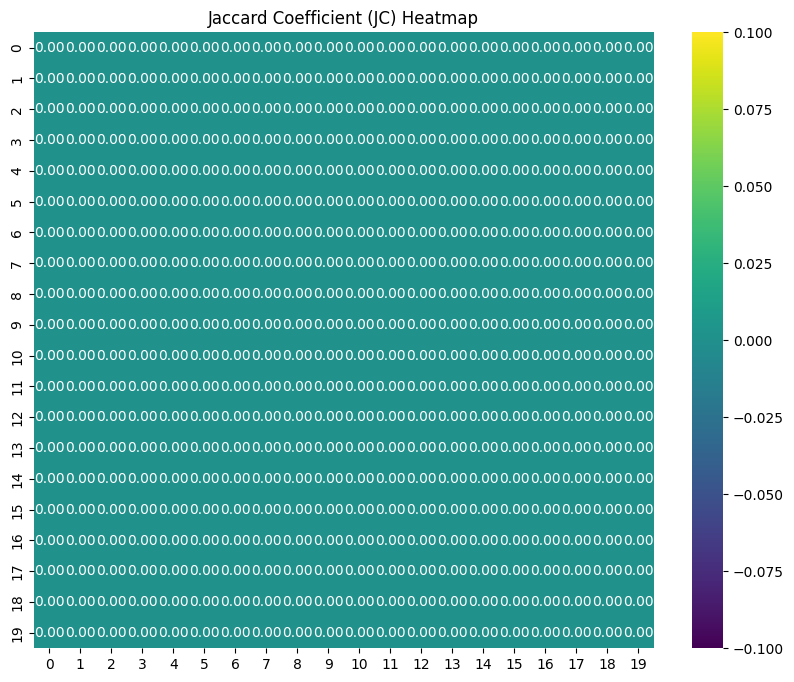

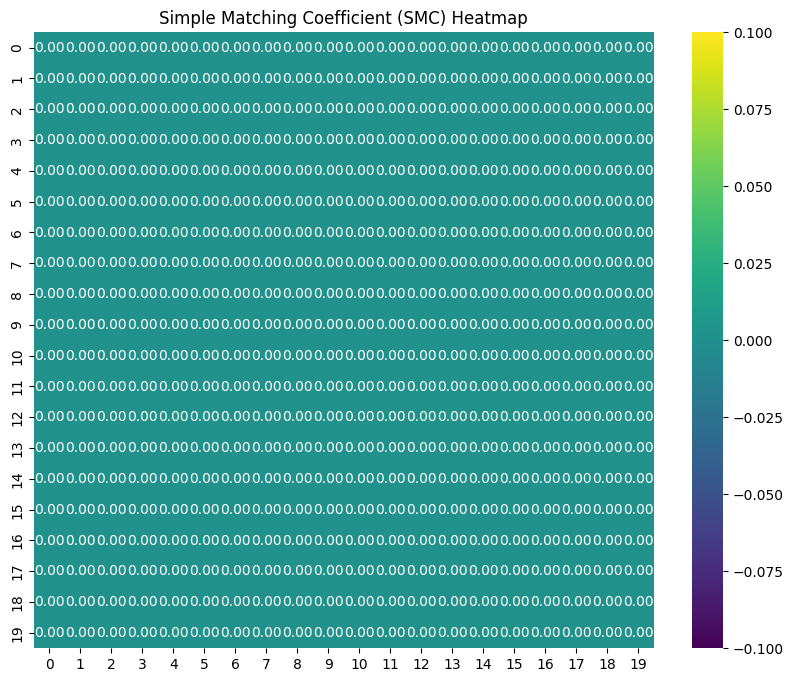

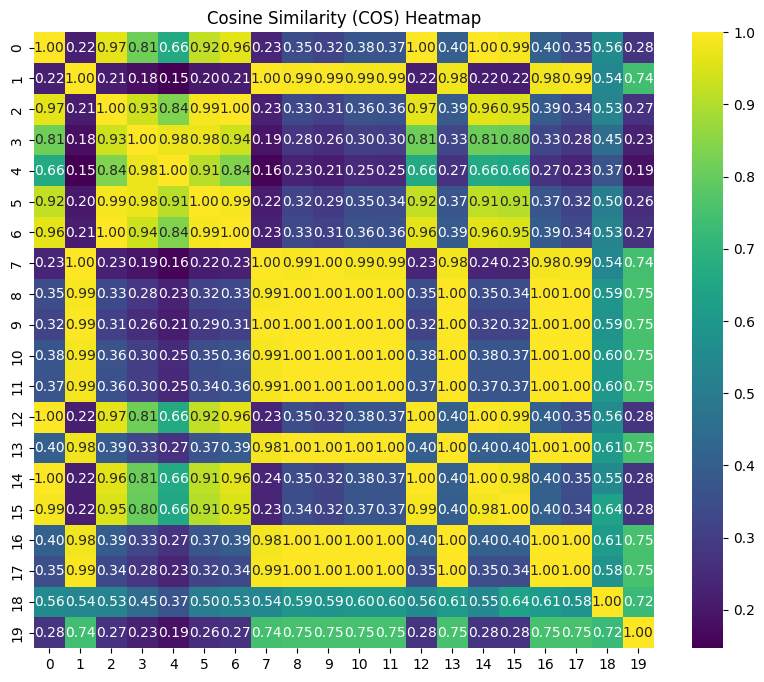

In [28]:
#Q10)
!pip install openpyxl seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_thyroid = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="thyroid0387_UCI")

vectors = df_thyroid.iloc[:20, :]

num_vectors = vectors.shape[0]

jc_matrix = np.zeros((num_vectors, num_vectors))
smc_matrix = np.zeros((num_vectors, num_vectors))
cos_matrix = np.zeros((num_vectors, num_vectors))

def calculate_jc(v1, v2):
    f11 = sum((v1 == '1') & (v2 == '1'))
    f01 = sum((v1 == '0') & (v2 == '1'))
    f10 = sum((v1 == '1') & (v2 == '0'))
    return f11 / (f01 + f10 + f11) if (f01 + f10 + f11) != 0 else 0

def calculate_smc(v1, v2):
    f11 = sum((v1 == '1') & (v2 == '1'))
    f00 = sum((v1 == '0') & (v2 == '0'))
    f01 = sum((v1 == '0') & (v2 == '1'))
    f10 = sum((v1 == '1') & (v2 == '0'))
    return (f11 + f00) / (f00 + f01 + f10 + f11) if (f00 + f01 + f10 + f11) != 0 else 0

def calculate_cos(v1, v2):
    v1 = pd.to_numeric(v1, errors='coerce')
    v2 = pd.to_numeric(v2, errors='coerce')
    v1 = np.nan_to_num(v1)
    v2 = np.nan_to_num(v2)
    dot_product = np.dot(v1, v2)
    mag_v1 = np.linalg.norm(v1)
    mag_v2 = np.linalg.norm(v2)
    return dot_product / (mag_v1 * mag_v2) if (mag_v1 != 0 and mag_v2 != 0) else 0

for i in range(num_vectors):
    for j in range(num_vectors):

        binary_cols = [col for col in vectors.columns if set(vectors[col].unique()).issubset({0, 1, '0', '1', 'f', 't', 'F', 'T', 'n', 'y', 'N', 'Y'})]
        vector1_binary = vectors.iloc[i, :][binary_cols].astype(str)
        vector2_binary = vectors.iloc[j, :][binary_cols].astype(str)

        jc_matrix[i, j] = calculate_jc(vector1_binary, vector2_binary)
        smc_matrix[i, j] = calculate_smc(vector1_binary, vector2_binary)


        vector1_all = vectors.iloc[i, 1:].values
        vector2_all = vectors.iloc[j, 1:].values
        cos_matrix[i, j] = calculate_cos(vector1_all, vector2_all)


plt.figure(figsize=(10, 8))
sns.heatmap(jc_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Jaccard Coefficient (JC) Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(smc_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Simple Matching Coefficient (SMC) Heatmap")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(cos_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Cosine Similarity (COS) Heatmap")
plt.show()

In [3]:
#Q2)
!pip install openpyxl
import pandas as pd
import numpy as np

try:
    df_purchase = pd.read_excel("/content/Lab_Session_Data.xlsx", sheet_name="Purchase data")
except FileNotFoundError:
    print("Error: Lab Session Data.xlsx not found. Please provide the file.")

    raise

product_names = df_purchase.columns[1:-1]

A = df_purchase[product_names].values
C = df_purchase.iloc[:, -1].values.reshape(-1, 1)

dimensionality = A.shape[1]
print(f"Dimensionality of the vector space: {dimensionality}")

num_vectors = A.shape[0]
print(f"Number of vectors: {num_vectors}")

A = np.nan_to_num(A)

A = np.where(np.isinf(A), np.finfo(A.dtype).max, A)

max_iter = 1000

A_pinv = np.linalg.pinv(A,rcond=1e-15, hermitian=False)

X = A_pinv @ C

cost_df = pd.DataFrame(X, index=product_names, columns=['Cost'])
print("\nCost of each product:")
print(cost_df.to_markdown(numalign="left", stralign="left"))

C_reconstructed = A @ X
difference = np.abs(C - C_reconstructed)
print("\nMaximum absolute difference between original and reconstructed C:", np.max(difference))

Dimensionality of the vector space: 20
Number of vectors: 10

Cost of each product:
|                  | Cost   |
|:-----------------|:-------|
| Candies (#)      | nan    |
| Mangoes (Kg)     | nan    |
| Milk Packets (#) | nan    |
| Payment (Rs)     | nan    |
| Unnamed: 5       | nan    |
| Unnamed: 6       | nan    |
| Unnamed: 7       | nan    |
| Unnamed: 8       | nan    |
| Unnamed: 9       | nan    |
| Unnamed: 10      | nan    |
| Unnamed: 11      | nan    |
| Unnamed: 12      | nan    |
| Unnamed: 13      | nan    |
| Unnamed: 14      | nan    |
| Unnamed: 15      | nan    |
| Unnamed: 16      | nan    |
| Unnamed: 17      | nan    |
| Unnamed: 18      | nan    |
| Candy            | nan    |
| Mango            | nan    |

Maximum absolute difference between original and reconstructed C: nan
